In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Harris Corner Detection

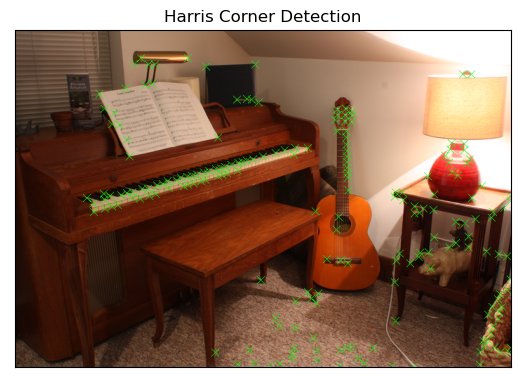

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'im0.png'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

block_size = 2
ksize = 3
k = 0.04
cornerness = cv2.cornerHarris(gray_image, block_size, ksize, k)
threshold = 0.01 * cornerness.max()

w = 5
h, w_img = cornerness.shape
suppressed = cornerness.copy()
for y in range(h):
    for x in range(w_img):
        window = cornerness[max(0, y - w):min(h, y + w + 1), max(0, x - w):min(w_img, x + w + 1)]
        if cornerness[y, x] != np.max(window):
            suppressed[y, x] = -np.inf

final_corners = np.where(suppressed > threshold)

cross_size = 5
line_thickness = 1
line_color = (0, 255, 0)

for y, x in zip(final_corners[0], final_corners[1]):
    cv2.line(image, (x - cross_size, y - cross_size), (x + cross_size, y + cross_size), line_color, line_thickness)
    cv2.line(image, (x - cross_size, y + cross_size), (x + cross_size, y - cross_size), line_color, line_thickness)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.title('Harris Corner Detection')
plt.xticks([]), plt.yticks([]) 
plt.show()
